In [1]:
from pandas import read_csv, DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


import pandas as pd
import seaborn as sns
import matplotlib

from statsmodels.tsa.arima.model import ARIMA
from dateutil.parser import parse

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
series = read_csv('../datasets/time_series_2020_1.csv', header=0, parse_dates=[0], index_col=0, squeeze=0)

In [4]:
print(series.head())

        sales
Month        
1-Jan  3845.8
2-Jan  1802.3
3-Jan   174.2
4-Jan  5936.2
5-Jan  1105.5


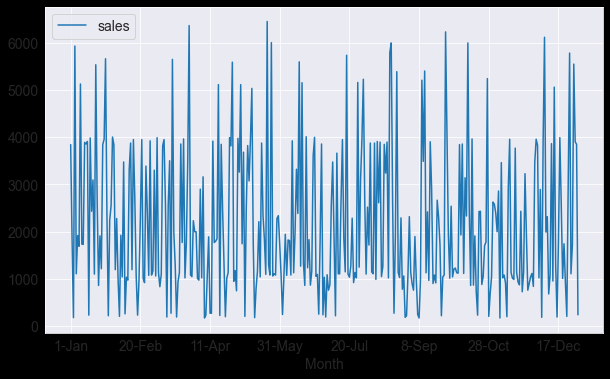

In [5]:

series.plot()
pyplot.show()

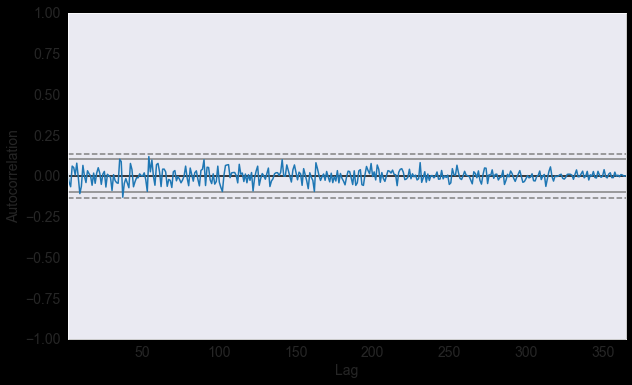

In [6]:
autocorrelation_plot(series)
pyplot.show()

In [7]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be

In [8]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3211.464
Date:                Fri, 07 Oct 2022   AIC                           6434.928
Time:                        10:19:35   BIC                           6458.311
Sample:                             0   HQIC                          6444.221
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8338      0.054    -15.406      0.000      -0.940      -0.728
ar.L2         -0.7081      0.067    -10.514      0.000      -0.840      -0.576
ar.L3         -0.5958      0.073     -8.155      0.0

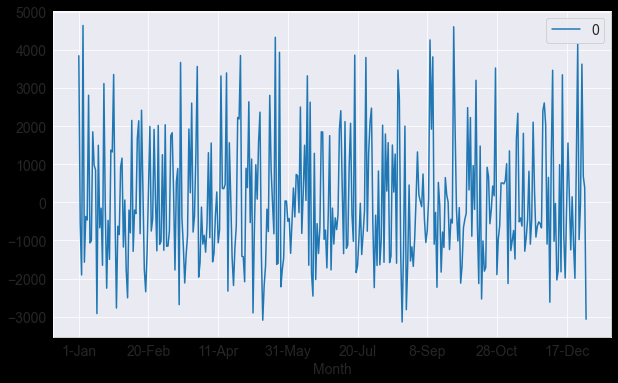

In [9]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

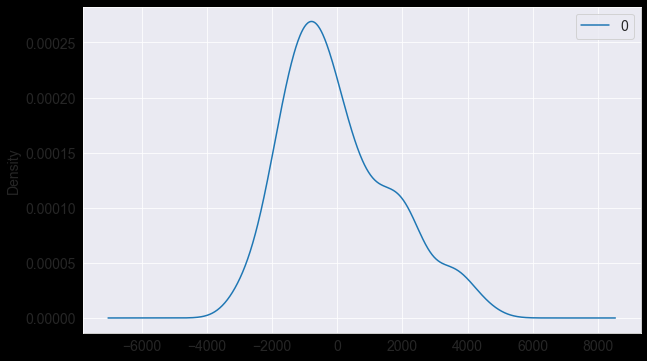

In [10]:
residuals.plot(kind = 'kde')
pyplot.show()

In [11]:
print(residuals.describe())

                 0
count   365.000000
mean     16.453555
std    1655.365230
min   -3137.219289
25%   -1171.950514
50%    -360.918420
75%    1136.220049
max    4639.826279


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [14]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predcited=%f, expected=%f' % (yhat, obs))
          

predcited=1872.860005, expected=180.900000
predcited=1202.016708, expected=214.400000
predcited=973.722883, expected=1078.700000
predcited=922.129607, expected=2318.200000
predcited=842.195551, expected=1132.300000
predcited=874.282993, expected=891.100000
predcited=977.748376, expected=757.100000
predcited=1199.423680, expected=1896.100000
predcited=1355.841503, expected=978.200000
predcited=1259.517775, expected=241.200000
predcited=976.838303, expected=167.500000
predcited=943.052915, expected=991.600000
predcited=888.982958, expected=5212.600000
predcited=1385.743980, expected=3490.700000
predcited=1561.790382, expected=5406.900000
predcited=2465.352454, expected=1125.600000
predcited=2902.235126, expected=2418.700000
predcited=3220.117569, expected=964.800000
predcited=3308.327287, expected=3906.100000
predcited=2811.412086, expected=2894.400000
predcited=2740.909617, expected=897.800000
predcited=1923.564631, expected=1078.700000
predcited=2144.109677, expected=911.200000
predcit

In [15]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1601.602


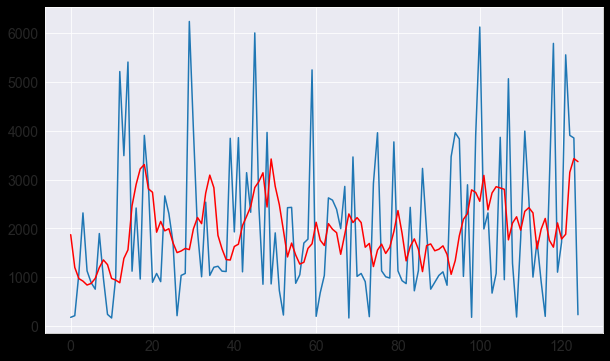

In [16]:
pyplot.plot(test)
pyplot.plot(predictions, color ='red')
pyplot.show()